<a href="https://colab.research.google.com/github/pa-datamining-b15/PA-DM-B15/blob/main/PA_DATA_MINING_B15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **B1 Kelompok 5 Data Mining**

### **Kelompok :**
1. MUHAMMAD PUTRA WIBISONO (2109116045) **<- KETUA**
2. ANGRAYNI MELINDA SAFITRI (2109116050)
3. DANIEL ROGATE FORD HUTAGALUNG (2109116060)

### **Judul :**
Global Emissions [Supervised] - Country Data [Unsupervised]

## Library

In [634]:
# Library yang dipakai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# **Supervised Learning**

## Bussines Understanding

Methane Emissions Dataset adalah kumpulan data yang mencatat emisi metana, yang merupakan gas rumah kaca berpotensi tinggi, dari berbagai sumber dalam lingkungan tertentu. Dataset ini berisi informasi tentang jumlah emisi metana yang dihasilkan oleh berbagai sektor seperti industri, pertanian, limbah, dan energi, serta lokasi geografis, waktu, dan faktor-faktor lain yang mempengaruhi emisi metana.

Tujuan dari Methane Emissions Dataset adalah untuk memahami pola emisi metana dari sektor industri dan pertanian. Data ini dapat membantu pemerintah, organisasi non-profit, dan industri untuk memahami sumber emisi metana dan mengembangkan strategi untuk mengurangi emisi gas rumah kaca dan mengurangi dampak perubahan iklim.

Beberapa pertanyaan yang dapat dijawab dengan menggunakan dataset ini adalah:

1. Berapa banyak emisi metana yang dihasilkan oleh sektor industri dan pertanian?
2. Apa saja sumber utama emisi metana di sektor industri dan pertanian?
3. Apa dampak emisi metana terhadap perubahan iklim?
4. Bagaimana kita dapat mengurangi emisi metana dari sektor industri dan pertanian?

Dalam pengolahan data ini, dapat digunakan teknik seperti analisis korelasi untuk mengidentifikasi hubungan antara variabel-variabel yang mempengaruhi emisi metana, dan analisis regresi untuk memprediksi emisi metana di masa depan. Dengan demikian, hasil analisis dapat digunakan sebagai dasar untuk mengembangkan kebijakan dan strategi untuk mengurangi emisi metana dan mengatasi dampak perubahan iklim.

## Data Understanding

### Penjelasan Kolom

1. Region : berisi informasi tentang wilayah geografis di mana pengukuran emisi metana dilakukan
2. Country : berisi informasi tentang negara di mana pengukuran emisi metana dilakukan
3. Emissions: berisi informasi tentang jumlah emisi metana yang diukur
4. Source : berisi informasi tentang sumber emisi metana
5. Type : berisi informasi tentang jenis emisi metana yang diukur
6. Segment : berisi informasi tentang jenis sumber emisi metana
7. Reason : penyebab mengapa emisi metana terjadi
8. baseYear : tahun acuan yang digunakan sebagai referensi untuk mengukur atau membandingkan emisi metana
9. notes: kolom yang berisi informasi tambahan


### Collect Data

In [635]:
# link data
link = "https://drive.google.com/file/d/1MEw70g-Lk1msTy7WA_VZwf_kWgFyaBCE/view?usp=sharing"


# Ubah bentuk file
link_file = "https://drive.google.com/uc?id=1MEw70g-Lk1msTy7WA_VZwf_kWgFyaBCE"

In [636]:
# Memuat data dari file CSV
df = pd.read_csv(link_file)
df

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
...,...,...,...,...,...,...,...,...,...
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [637]:
# Menampilkan informasi umum tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1548 non-null   int64  
 1   region      1548 non-null   object 
 2   country     1548 non-null   object 
 3   emissions   1548 non-null   float64
 4   type        1548 non-null   object 
 5   segment     1548 non-null   object 
 6   reason      1548 non-null   object 
 7   baseYear    1548 non-null   object 
 8   notes       1548 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 109.0+ KB


In [638]:
# Melihat statistik deskriptif data
df.describe

<bound method NDFrame.describe of       Unnamed: 0  region  country      emissions         type  \
0              0  Africa  Algeria     257.611206  Agriculture   
1              1  Africa  Algeria       0.052000       Energy   
2              2  Africa  Algeria     130.798996       Energy   
3              3  Africa  Algeria      69.741898       Energy   
4              4  Africa  Algeria     213.987000       Energy   
...          ...     ...      ...            ...          ...   
1543        1543   World    World    3102.500000       Energy   
1544        1544   World    World   30296.500000       Energy   
1545        1545   World    World  133350.984375       Energy   
1546        1546   World    World    9737.874023        Other   
1547        1547   World    World   70758.710938        Waste   

                                             segment    reason   baseYear  \
0                                              Total       All  2019-2021   
1                              

In [639]:
# Menampilkan beberapa baris pertama data
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [640]:
df.tail()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
1543,1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022,Not available
1544,1544,World,World,30296.500000,Energy,Steam coal,All,2022,Not available
1545,1545,World,World,133350.984375,Energy,Total,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1546,1546,World,World,9737.874023,Other,Total,All,2019-2021,Average based on United Nations Framework Conv...
1547,1547,World,World,70758.710938,Waste,Total,All,2019-2021,Average based on United Nations Framework Conv...


In [641]:
# Melihat tipe data kolom
df.dtypes

Unnamed: 0      int64
region         object
country        object
emissions     float64
type           object
segment        object
reason         object
baseYear       object
notes          object
dtype: object

#### Visualisasi Comparison

<Axes: xlabel='segment', ylabel='count'>

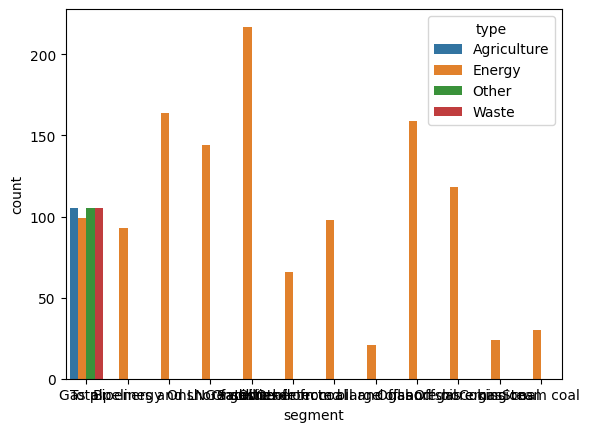

In [642]:
# Visualisasi yang menampilkan berapa banyak type berdasarkan segment
sns.countplot(data=df,x="segment",hue="type")

<Axes: xlabel='count', ylabel='reason'>

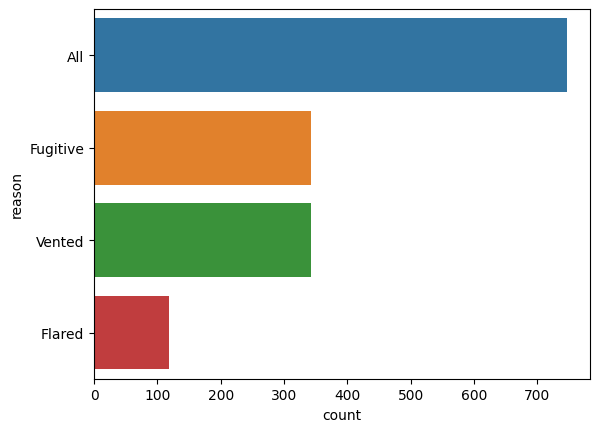

In [643]:
# Visualisasi yang menampilkan berapa banyak reason
sns.countplot(data=df,y="reason")

#### Visualisasi Distribution

<Axes: xlabel='type', ylabel='Count'>

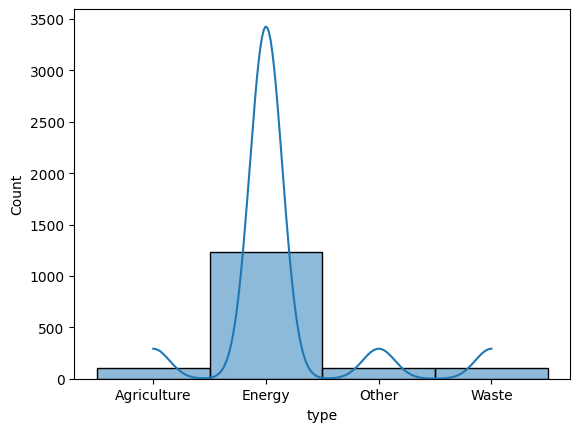

In [644]:
# Histogram untuk type
sns.histplot(data=df, x="type", kde=True)

<Axes: xlabel='Count', ylabel='segment'>

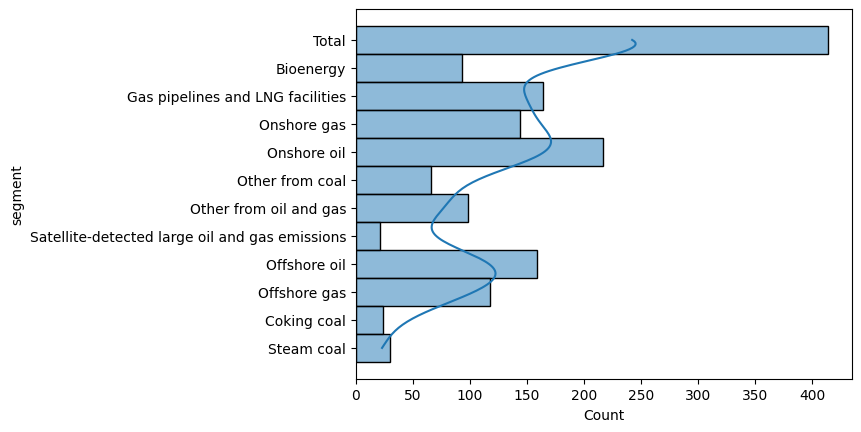

In [645]:
# Histogram untuk segment
sns.histplot(data=df, y="segment", kde=True)

## Data Preparation

### Cleaning Data

In [646]:
# Membuat variabel yang berisi df awal 
df1 = pd.read_csv(link_file)

df = df.drop(['country','Unnamed: 0','segment', 'notes'], axis=1)

In [647]:
df = df.rename(columns={'baseYear' : 'base_year'})

In [648]:
df.isnull().sum()

region       0
emissions    0
type         0
reason       0
base_year    0
dtype: int64

In [649]:
df.fillna(0, inplace=True)

In [650]:
df.drop_duplicates(inplace=True)

In [651]:
# Memfilter data untuk menampilkan data dengan nilai base_Year = 2022
filtered_df = df[df['base_year'] == '2022']
filtered_df

,region,emissions,type,reason,base_year
1,Africa,0.052000,Energy,All,2022
2,Africa,130.798996,Energy,Fugitive,2022
3,Africa,69.741898,Energy,Vented,2022
4,Africa,213.987000,Energy,Fugitive,2022
5,Africa,464.308014,Energy,Vented,2022
...,...,...,...,...,...
1541,World,1518.482056,Energy,All,2022
1542,World,2292.331787,Energy,All,2022
1543,World,3102.500000,Energy,All,2022
1544,World,30296.500000,Energy,All,2022


### Encoding

In [652]:
df = pd.get_dummies(df)

In [653]:
df

,emissions,region_Africa,region_Asia Pacific,region_Central and South America,region_Europe,region_Middle East,region_North America,region_Other,region_Russia & Caspian,region_World,type_Agriculture,type_Energy,type_Other,type_Waste,reason_All,reason_Flared,reason_Fugitive,reason_Vented,base_year_2019-2021,base_year_2022
0,257.611206,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0.052000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,130.798996,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,69.741898,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,213.987000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,3102.500000,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1544,30296.500000,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1545,133350.984375,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1546,9737.874023,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0


### Splitting

In [654]:
from sklearn.model_selection import train_test_split

df_baru= df.sample(100)

# Memisahkan fitur dan label
X = df_baru.drop('base_year_2022', axis=1)  # Mengambil semua kolom kecuali kolom 'base_year_2022' sebagai fitur
y = df_baru['base_year_2022']  # Mengambil kolom 'base_year_2022' sebagai label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Jumlah data pada data training:", len(X_train))
print("Jumlah data pada data testing:", len(X_test))

Jumlah data pada data training: 80
Jumlah data pada data testing: 20


## Modelling

### C4.5

In [655]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# inisialisasi model decision tree dengan algoritma C4.5
clf = DecisionTreeClassifier(criterion='entropy')

# melatih model dengan data training
clf.fit(X_train, y_train)

# melakukan prediksi dengan data testing
y_pred = clf.predict(X_test)

# menghitung akurasi dari model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi C45: {:.2f}%".format(accuracy*100))

Akurasi C45: 100.00%


### KNN (Manual)

In [656]:
# Menghitung jarak antara dua titik
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Mencari k tetangga terdekat dari data uji dalam data latih
def get_nearest_neighbors(X_train, y_train, X_test, k):
    distances = []
    for i in range(X_train.shape[0]):
        distance = euclidean_distance(X_test, X_train.iloc[i, :])
        distances.append((distance, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    return neighbors

# Melakukan prediksi kelas berdasarkan k tetangga terdekat
def predict(X_train, y_train, X_test, k):
    neighbors = get_nearest_neighbors(X_train, y_train, X_test, k)
    labels = [neighbor[1] for neighbor in neighbors]
    predicted_label = max(set(labels), key=labels.count)
    return predicted_label

# Melakukan prediksi untuk seluruh data uji
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(X_test.shape[0]):
        predicted_label = predict(X_train, y_train, X_test.iloc[i, :], k)
        y_pred.append(predicted_label)
    return y_pred

k = 3  # Jumlah tetangga terdekat yang digunakan
y_pred = knn_predict(X_train, y_train, X_test, k)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi KNN: {:.2%}".format(accuracy))


Akurasi KNN: 90.00%


### Naive Bayes (Manual)

In [657]:
# Menghitung probabilitas prior untuk setiap kelas
def calculate_prior(y_train):
    classes = np.unique(y_train)
    prior = {}
    total_samples = len(y_train)
    for cls in classes:
        prior[cls] = np.sum(y_train == cls) / total_samples
    return prior

# Menghitung probabilitas likelihood untuk setiap fitur dan kelas
def calculate_likelihood(X_train, y_train, feature, cls):
    # Menghitung jumlah kemunculan fitur di kelas yang diberikan
    feature_counts = np.sum((X_train == feature) & (y_train == cls), axis=0)
    # Menghitung total jumlah sampel pada kelas yang diberikan
    total_samples_in_cls = np.sum(y_train == cls)
    # Menghitung likelihood sebagai probabilitas kemunculan fitur di kelas yang diberikan
    likelihood = feature_counts / total_samples_in_cls
    return likelihood

# Melakukan prediksi kelas menggunakan algoritma Naive Bayes
def predict(X_train, y_train, X_test):
    predicted_labels = []
    prior = calculate_prior(y_train)
    classes = np.unique(y_train)
    for i in range(X_test.shape[0]):
        sample = X_test.iloc[i, :]
        posterior = {}
        for cls in classes:
            likelihood = 1
            for feature in X_train.columns:
                likelihood *= calculate_likelihood(X_train, y_train, sample[feature], cls).get(feature, 0)
            posterior[cls] = prior[cls] * likelihood
        predicted_label = max(posterior, key=posterior.get)
        predicted_labels.append(predicted_label)
    return predicted_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = predict(X_train, y_train, X_test)

accuracy = np.mean(np.array(y_pred) == np.array(y_test))
print("Akurasi Naive Bayes: {:.2%}".format(accuracy))


Akurasi Naive Bayes: 15.00%


## Evaluation

### C4.5

In [658]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Inisialisasi model Decision Tree (C4.5)
clf = DecisionTreeClassifier(criterion='entropy')

# Melatih model dengan data latih
clf.fit(X_train, y_train)

# Melakukan prediksi dengan data uji
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy*100))

# Menghitung ROC AUC score untuk setiap kelas
roc_auc_scores = {}
classes = clf.classes_
for cls in classes:
    y_true_cls = np.where(y_test == cls, 1, 0)
    y_pred_cls = np.where(y_pred == cls, 1, 0)
    roc_auc_scores[cls] = roc_auc_score(y_true_cls, y_pred_cls)

# Menampilkan ROC AUC score untuk setiap kelas
for cls, score in roc_auc_scores.items():
    print('ROC AUC score untuk kelas {}: {:.2f}'.format(cls, score))

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Akurasi: 100.00%
ROC AUC score untuk kelas 0: 1.00
ROC AUC score untuk kelas 1: 1.00
Confusion Matrix:
[[ 3  0]
 [ 0 17]]


Hasil evaluasi performa yang sangat baik ini menunjukkan bahwa model klasifikasi yang digunakan pada dataset tersebut dapat diandalkan dan dapat digunakan untuk memprediksi kelas pada data yang belum pernah dilihat sebelumnya dengan akurasi yang tinggi.

In [659]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

# Cetak nilai TP, FP, FN, dan TN
print("True positive (TP)  :", TP)
print("False positive (FP) :", FP)
print("False negative (FN) :", FN)
print("True negative (TN)  :", TN)
print('')

precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FN + TN + FP)
specificity = TN / (TN + FP)

print('precision = ', precision * 100, '%')
print('recall = ', recall * 100, '%')
print('f1 = ', f1 * 100, '%')
print('accuracy = ', accuracy * 100, '%')
print('specificity = ', specificity * 100, '%')


True positive (TP)  : 3
False positive (FP) : 0
False negative (FN) : 0
True negative (TN)  : 17

precision =  100.0 %
recall =  100.0 %
f1 =  100.0 %
accuracy =  100.0 %
specificity =  100.0 %


#### Visualisasi C4.5

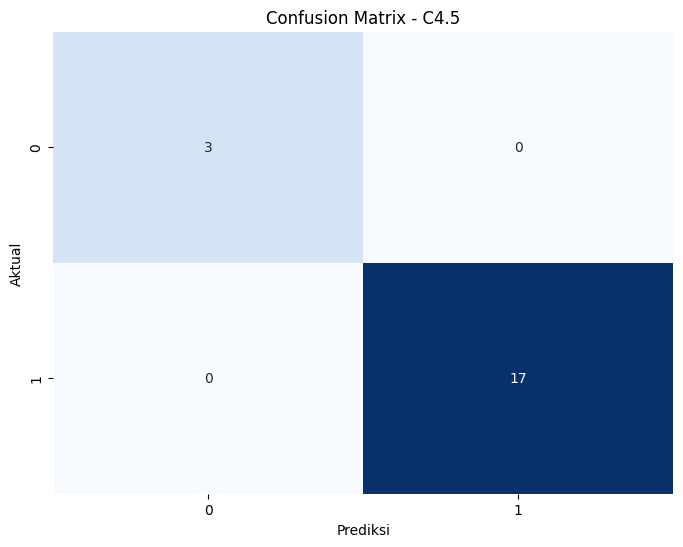

In [660]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - C4.5')
plt.show()

### KNN

In [661]:
# Menghitung jarak antara dua titik
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Mencari k tetangga terdekat dari data uji dalam data latih
def get_nearest_neighbors(X_train, y_train, X_test, k):
    distances = []
    for i in range(X_train.shape[0]):
        distance = euclidean_distance(X_test, X_train.iloc[i, :])
        distances.append((distance, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    return neighbors

# Melakukan prediksi kelas berdasarkan k tetangga terdekat
def predict(X_train, y_train, X_test, k):
    neighbors = get_nearest_neighbors(X_train, y_train, X_test, k)
    labels = [neighbor[1] for neighbor in neighbors]
    predicted_label = max(set(labels), key=labels.count)
    return predicted_label

# Melakukan prediksi untuk seluruh data uji
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(X_test.shape[0]):
        predicted_label = predict(X_train, y_train, X_test.iloc[i, :], k)
        y_pred.append(predicted_label)
    return y_pred

k = 3  # Jumlah tetangga terdekat yang digunakan
y_pred = knn_predict(X_train, y_train, X_test, k)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi KNN: {:.2%}".format(accuracy))

# Menghitung ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score KNN: {:.2%}".format(roc_auc))

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix KNN:\n", cm)


Akurasi KNN: 90.00%
ROC AUC Score KNN: 80.39%
Confusion Matrix KNN:
 [[ 2  1]
 [ 1 16]]


Hasil evaluasi performa yang lumayan baik ini dapat disebabkan oleh beberapa faktor seperti jumlah tetangga yang dipilih pada model KNN, kualitas dan karakteristik fitur-fitur pada dataset, dan distribusi data yang tidak merata.

In [662]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Cetak nilai TP, FP, FN, dan TN
print("True positive (TP)  :", TP)
print("False positive (FP) :", FP)
print("False negative (FN) :", FN)
print("True negative (TN)  :", TN)
print('')

precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FN + TN + FP)
specificity = TN / (TN + FP)

print('precision = ', precision * 100, '%')
print('recall = ', recall * 100, '%')
print('f1 = ', f1 * 100, '%')
print('accuracy = ', accuracy * 100, '%')
print('specificity = ', specificity * 100, '%')


True positive (TP)  : 2
False positive (FP) : 1
False negative (FN) : 1
True negative (TN)  : 16

precision =  66.66666666666666 %
recall =  66.66666666666666 %
f1 =  66.66666666666666 %
accuracy =  90.0 %
specificity =  94.11764705882352 %


#### Visualisasi KNN

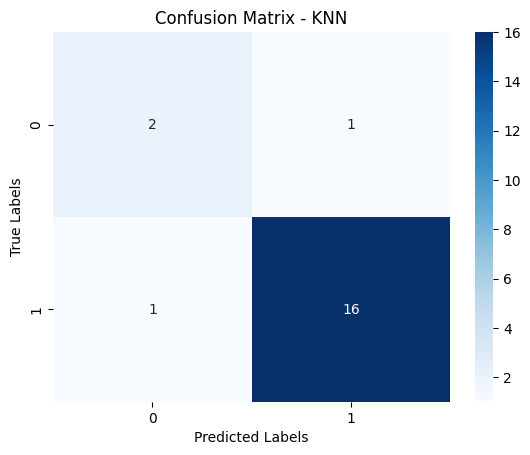

In [663]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menyediakan label untuk sumbu x dan y pada Confusion Matrix
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Menyeting label pada sumbu x dan y pada Confusion Matrix
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menyeting judul pada Confusion Matrix
plt.title('Confusion Matrix - KNN')

# Menampilkan Confusion Matrix
plt.show()


### Naive Bayes

In [664]:
# Melakukan prediksi kelas menggunakan algoritma Naive Bayes
def predict(X_train, y_train, X_test):
    predicted_labels = []
    prior = calculate_prior(y_train)
    classes = np.unique(y_train)
    for i in range(X_test.shape[0]):
        sample = X_test.iloc[i, :]
        posterior = {}
        for cls in classes:
            likelihood = 1
            for feature in X_train.columns:
                likelihood *= calculate_likelihood(X_train, y_train, sample[feature], cls).get(feature, 0)
            posterior[cls] = prior[cls] * likelihood
        predicted_label = max(posterior, key=posterior.get)
        predicted_labels.append(predicted_label)
    return predicted_labels

# Menghitung ROC dan AUC
def calculate_roc_auc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Menghitung confusion matrix
def calculate_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm

# serta melakukan prediksi dengan Naive Bayes dan menghitung ROC, AUC, dan confusion matrix
# Bagi dataset menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan prediksi dengan Naive Bayes
y_pred = predict(X_train, y_train, X_test)

# Menghitung akurasi, ROC, AUC, dan confusion matrix
accuracy = np.mean(np.array(y_pred) == np.array(y_test))
fpr, tpr, roc_auc = calculate_roc_auc(y_test, y_pred)
cm = calculate_confusion_matrix(y_test, y_pred)

# Menampilkan hasil
print("Akurasi Naive Bayes: {:.2%}".format(accuracy))
print("ROC AUC: {:.2%}".format(roc_auc))
print("Confusion Matrix:\n{}".format(cm))


Akurasi Naive Bayes: 15.00%
ROC AUC: 50.00%
Confusion Matrix:
[[ 3  0]
 [17  0]]


Hasil evaluasi performa yang buruk ini dapat disebabkan oleh beberapa faktor seperti kualitas dan karakteristik fitur-fitur pada dataset, distribusi data yang tidak merata, atau kemungkinan adanya asumsi yang tidak valid dalam model Naive Bayes

In [665]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

# Cetak nilai TP, FP, FN, dan TN
print("True positive (TP)  :", TP)
print("False positive (FP) :", FP)
print("False negative (FN) :", FN)
print("True negative (TN)  :", TN)
print('')

precision = TP / (TP+FP)
recall = TP / (TP+FN)
f1 = (2 * precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FN + TN + FP)
specificity = TN / (TN + FP)

print('precision = ', precision * 100, '%')
print('recall = ', recall * 100, '%')
print('f1 = ', f1 * 100, '%')
print('accuracy = ', accuracy * 100, '%')
print('specificity = ', specificity * 100, '%')


True positive (TP)  : 3
False positive (FP) : 0
False negative (FN) : 17
True negative (TN)  : 0

precision =  100.0 %
recall =  15.0 %
f1 =  26.08695652173913 %
accuracy =  15.0 %
specificity =  nan %


<ipython-input-665-734418e2a172>:17: RuntimeWarning:

invalid value encountered in long_scalars



#### Visualisasi Naive Bayes

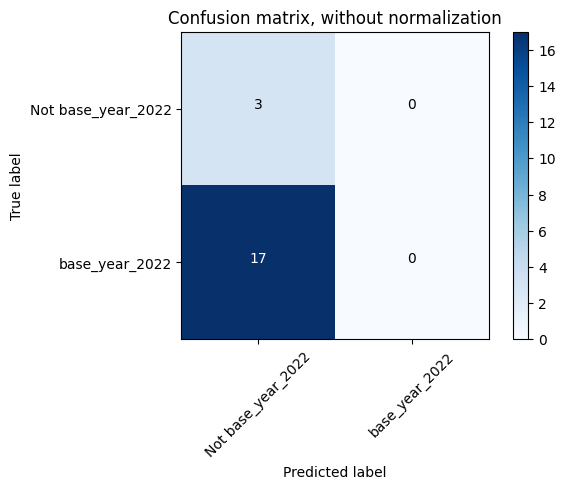

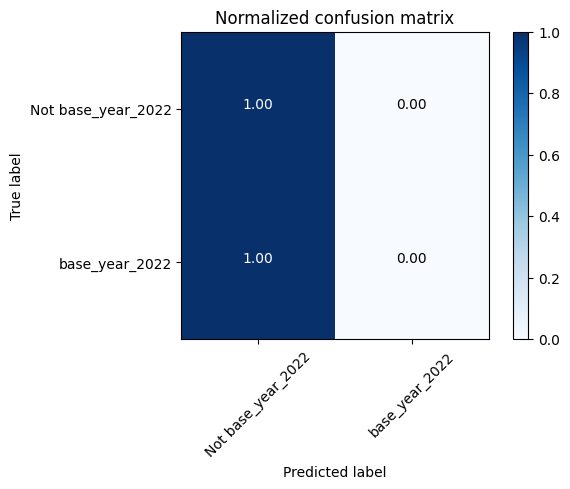

In [666]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Not base_year_2022', 'base_year_2022'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Not base_year_2022', 'base_year_2022'], normalize=True, title='Normalized confusion matrix')

plt.show()


## Deployment

In [667]:
df.iloc[:-1:].to_csv('Supervised.csv', index=False)
df1.iloc[:-1:].to_csv('Supervised-Awal.csv', index=False)

# **Unsupervised Learning**

## Bussines Understanding




Country Data adalah kumpulan data yang berisi informasi tentang karakteristik ekonomi dan kesehatan suatu negara.

Dataset ini dapat memberikan informasi yang berharga bagi pemerintah, organisasi internasional, dan peneliti dalam pengambilan keputusan dan perencanaan strategis di bidang ekonomi dan kesehatan. Beberapa contoh penggunaan dataset country-data adalah dalam analisis kesehatan global, analisis ekonomi dan keuangan, serta pembuatan kebijakan publik.

Tujuan dari unsupervised learning data ini adalah untuk mengkategorikan negara menggunakan faktor sosial-ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

Beberapa pertanyaan yang dapat dijawab dengan menggunakan dataset ini adalah:

1. Bagaimana karakteristik sosial ekonomi yang membedakan antara negara-negara maju dan negara-negara berkembang?
2. Apa faktor-faktor yang berkontribusi pada keberhasilan suatu negara dalam hal ekonomi, kesehatan, dan pendidikan?
3. Bagaimana perbedaan antara negara-negara yang berbeda dalam hal demografi, sosial, ekonomi, dan lingkungan?
4. Apakah ada kelompok negara yang memiliki karakteristik serupa?

Dalam pengolahan data ini, dapat digunakan teknik-teknik unsupervised learning seperti clustering dan dimensionality reduction untuk menemukan kelompok-kelompok negara yang memiliki karakteristik serupa dan memberikan insight yang berguna bagi pengambilan keputusan. Analisis juga dapat dilakukan untuk mengidentifikasi faktor-faktor yang berpengaruh terhadap pertumbuhan ekonomi, kesehatan, dan pendidikan suatu negara. Dengan demikian, hasil analisis dapat digunakan sebagai dasar untuk mengembangkan strategi yang lebih efektif untuk membantu negara-negara dalam mengatasi tantangan yang dihadapi.






## Data Understanding

### Penjelasan Kolom

1. country : Nama negara

2. child_mort: Tingkat kematian anak di bawah usia 5 tahun per 1000 kelahiran hidup.

3. exports: Ekspor barang dan jasa per capita suatu negara dalam USD.

4. health: Total pengeluaran kesehatan per capita suatu negara dalam USD.

5. imports: Impor barang dan jasa per capita suatu negara dalam USD.

6. income: Pendapatan bersih sesorang per capita suatu negara dalam USD.

7. inflation: Tingkat inflasi tahunan suatu negara.

8. life_expec: Rata-rata umur harapan hidup suatu negara.

9. total_fer: Jumlah rata-rata anak yang akan dilahirkan oleh setiap wanita dalam usia reproduktif suatu negara.

10. gdpp: Produk domestik bruto per capita suatu negara dalam USD.

### Collect data

In [668]:
link = 'https://drive.google.com/file/d/1JNLHPAEcvjEMKh30BVBRVursnhuc4Y1V/view?usp=sharing'

linkfile =  "https://drive.google.com/uc?id=1JNLHPAEcvjEMKh30BVBRVursnhuc4Y1V"
df = pd.read_csv(linkfile)
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [670]:
df.describe

<bound method NDFrame.describe of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2    

In [671]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [672]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [673]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [674]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [675]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [676]:
# opsional jika memiliki data/sel yang kosong

# df = df.dropna()
# df.isnull().sum()

In [677]:
 df["country"].value_counts()

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64

In [678]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [679]:
df.shape

(167, 10)

### Explore Data

In [680]:
df.corr()

<ipython-input-680-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


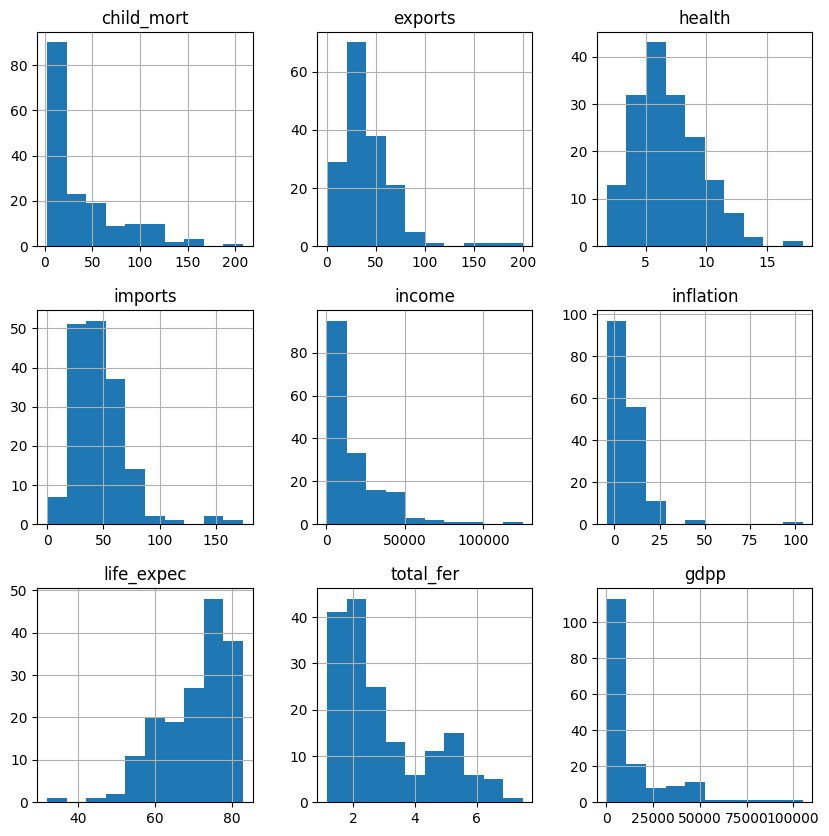

In [681]:
df.hist(figsize=(10,10))
plt.show()


<ipython-input-682-88edb43bf50b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



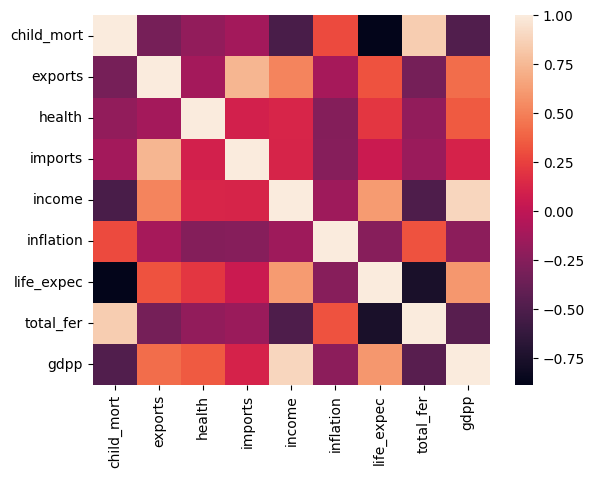

In [682]:
sns.heatmap(df.corr())
plt.show()

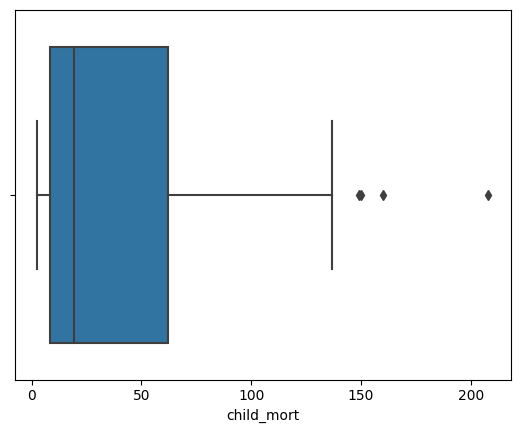

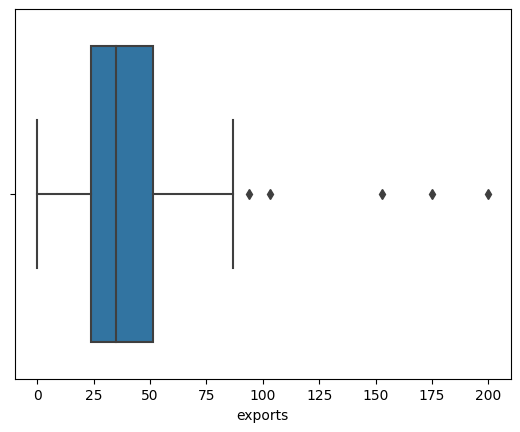

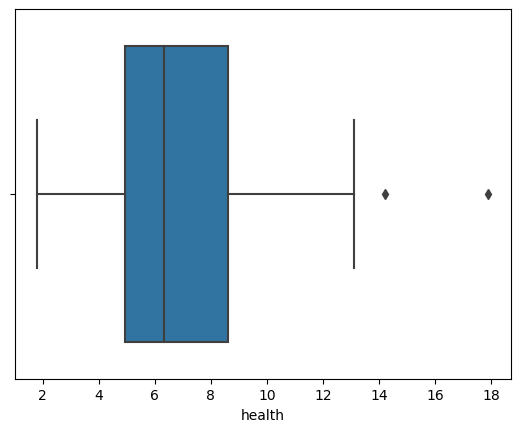

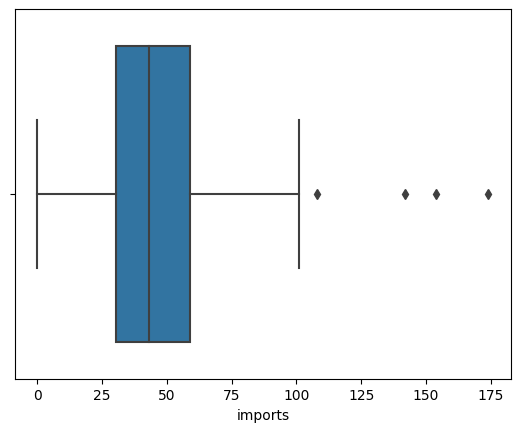

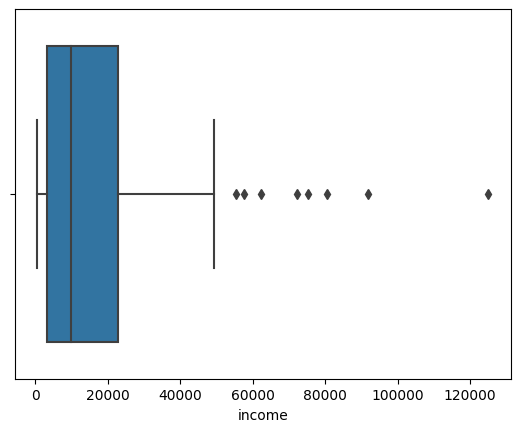

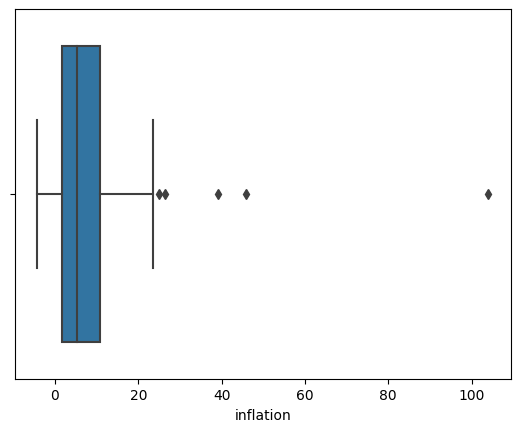

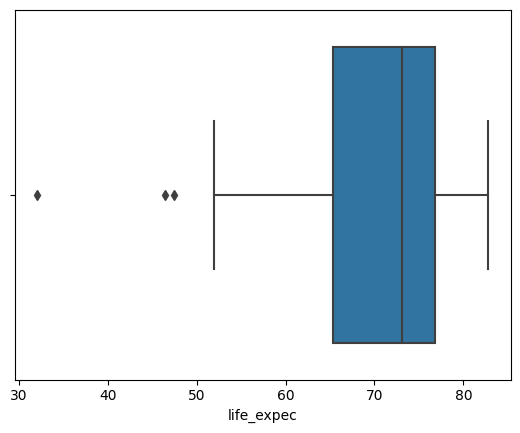

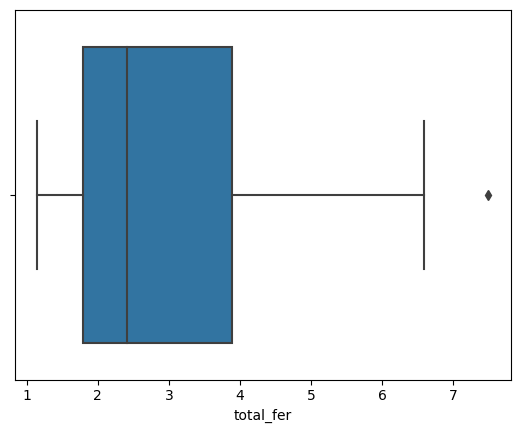

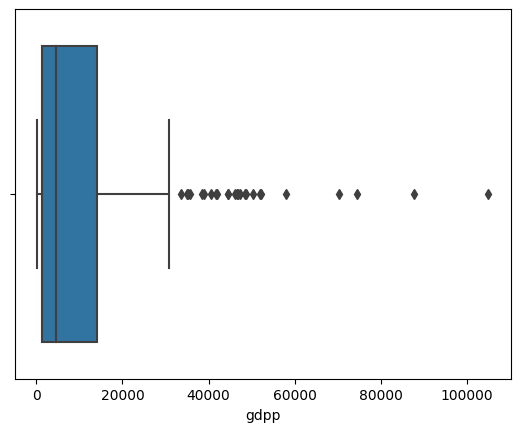

In [683]:
sns.boxplot(x='child_mort', data=df)
plt.show()
sns.boxplot(x='exports', data=df)
plt.show()
sns.boxplot(x='health', data=df)
plt.show()
sns.boxplot(x='imports', data=df)
plt.show()
sns.boxplot(x='income', data=df)
plt.show()
sns.boxplot(x='inflation', data=df)
plt.show()
sns.boxplot(x='life_expec', data=df)
plt.show()
sns.boxplot(x='total_fer', data=df)
plt.show()
sns.boxplot(x='gdpp', data=df)
plt.show()

## Data Preparation

In [684]:
# membuat variabel yang memuat df semula 
df2 = pd.read_csv(linkfile)

df.drop_duplicates(inplace=True)
df.drop("country", axis=1, inplace=True)
df = df.rename(columns={'gdpp' : 'gdp'})
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdp           0
dtype: int64

In [685]:
# Mengisi missing value pada kolom 'gdp' dan 'income' dengan nilai median
df['gdp'].fillna(df['gdp'].median(), inplace=True)
df['income'].fillna(df['income'].median(), inplace=True)

#### Encoding

In [686]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Melakukan encoding pada kolom 'health'
df['health'] = le.fit_transform(df['health'])

#### Preprocessing

In [687]:
# Untuk Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,KMeans,AffinityPropagation,Birch

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [688]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada kolom 'child_mort', 'exports', 'imports', 'income', 'inflation', 'life_expec', dan 'total_fer'
df[['child_mort', 'exports', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']] = scaler.fit_transform(df[['child_mort', 'exports', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

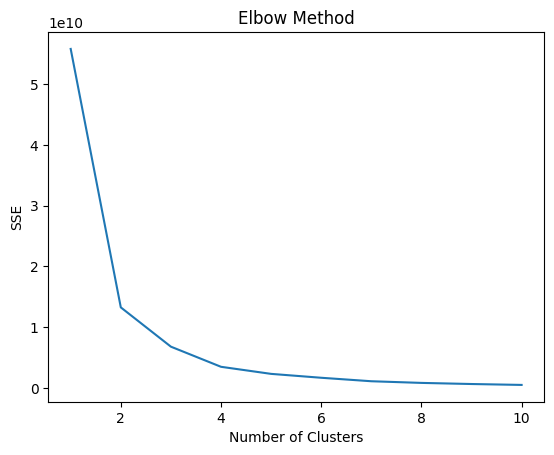

In [689]:
# Menentukan jumlah cluster dengan Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


## Modelling

#### K Means

In [690]:
# Melakukan clustering dengan algoritma KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Menambahkan kolom 'Cluster' pada data
df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



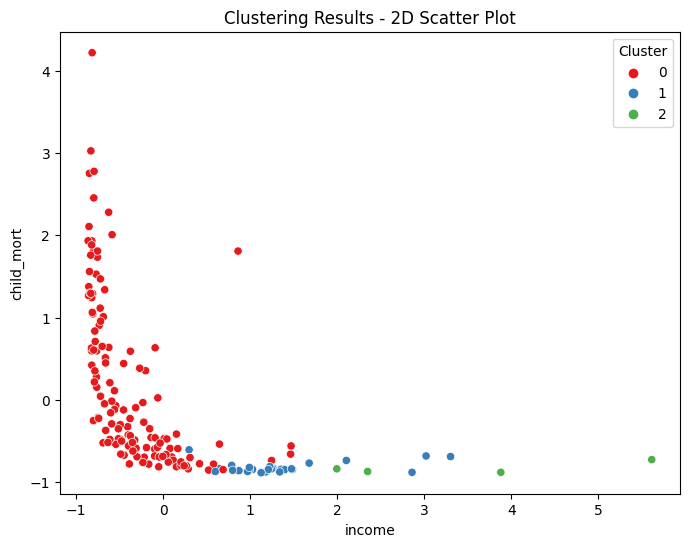

In [691]:
# Visualisasi hasil clustering pada grafik 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='income', y='child_mort', hue='Cluster', palette='Set1')
plt.title('Clustering Results - 2D Scatter Plot')
plt.show()

# Visualisasi hasil clustering pada grafik 3D
fig = px.scatter_3d(df, x='gdp', y='income', z='child_mort', color='Cluster', size_max=10, opacity=0.7, width=800, height=600)
fig.update_layout(scene=dict(xaxis_title='GDP Per Capita', yaxis_title='Income', zaxis_title='Child Mortality'), title='Clustering Results - 3D Scatter')
fig.show()

Dari hasil visualisasi clustering pada grafik 2D dan 3D, kita dapat melakukan analisis cluster sebagai berikut:

**Cluster 0**: Negara-negara dengan GDP per capita rendah, tingkat kematian anak yang tinggi, dan pendapatan rendah.

**Cluster 1**: Negara-negara dengan GDP per capita sedang, tingkat kematian anak yang sedang, dan pendapatan sedang.

**Cluster 2**: Negara-negara dengan GDP per capita tinggi, tingkat kematian anak yang rendah, dan pendapatan tinggi.

#### Analisis Cluster

In [692]:
# Analisis Cluster
# Menambahkan kolom Cluster ke dalam DataFrame
df['Cluster'] = kmeans.labels_

# Mencari nilai rata-rata pada setiap variabel dalam setiap cluster
cluster_avg = df.groupby(['Cluster']).mean()

# Mencari total jumlah negara dalam setiap cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Menampilkan hasil analisis cluster
print('Cluster Analysis:')
print('------------------')
print(cluster_counts)
print(cluster_avg)

Cluster Analysis:
------------------
0    136
1     27
2      4
Name: Cluster, dtype: int64
         child_mort   exports      health   imports    income  inflation  \
Cluster                                                                    
0          0.187695 -0.115991   66.794118 -0.004449 -0.365391   0.111346   
1         -0.822382  0.344973  107.592593 -0.069719  1.328061  -0.510739   
2         -0.830557  1.615123   90.000000  0.621858  3.458866  -0.338275   

         life_expec  total_fer           gdp  
Cluster                                       
0         -0.250425   0.172980   5367.750000  
1          1.086889  -0.757890  40640.740741  
2          1.177951  -0.765559  84425.000000  


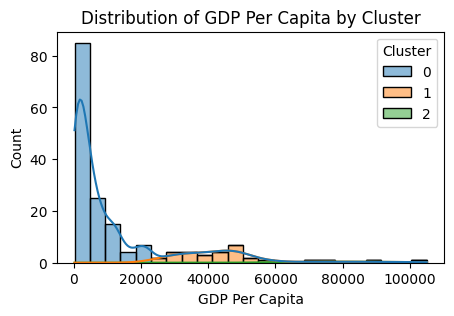

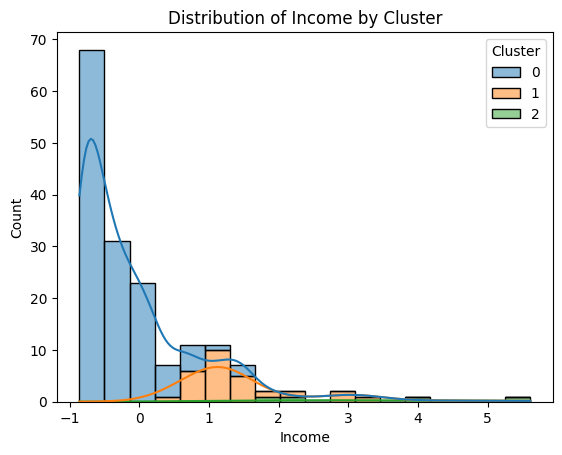

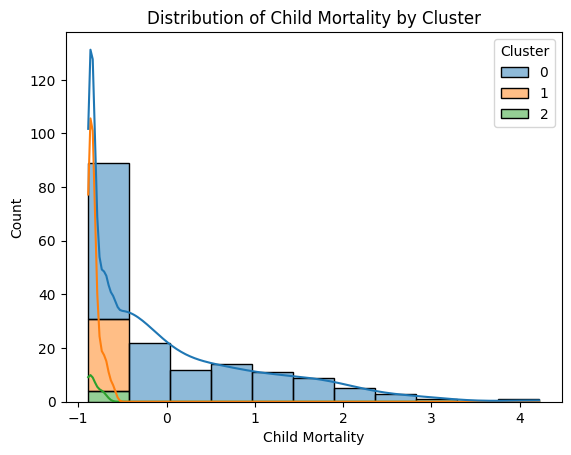

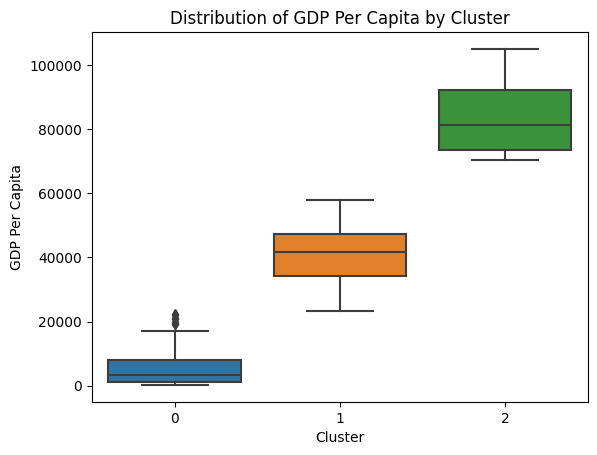

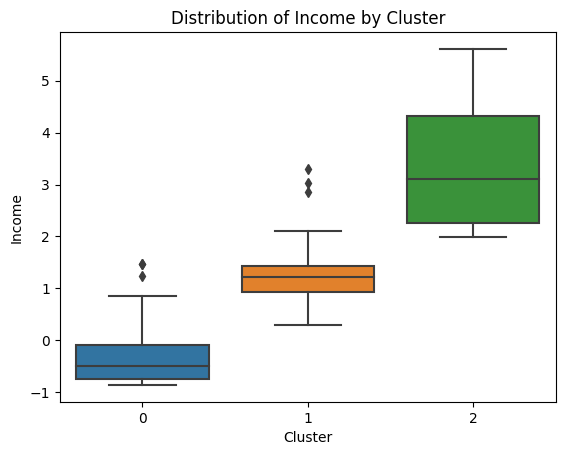

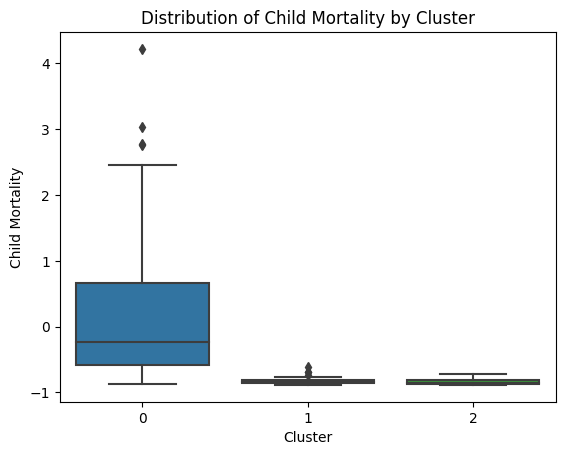

In [693]:
import seaborn as sns

# Membuat kolom Cluster sebagai string
df['Cluster'] = df['Cluster'].astype(str)

# Distribusi fitur-fitur pada setiap cluster
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='gdp', hue='Cluster', multiple='stack', kde=True)
plt.xlabel('GDP Per Capita')
plt.title('Distribution of GDP Per Capita by Cluster')
plt.show()

sns.histplot(data=df, x='income', hue='Cluster', multiple='stack', kde=True)
plt.xlabel('Income')
plt.title('Distribution of Income by Cluster')
plt.show()

sns.histplot(data=df, x='child_mort', hue='Cluster', multiple='stack', kde=True)
plt.xlabel('Child Mortality')
plt.title('Distribution of Child Mortality by Cluster')
plt.show()

# Boxplot untuk melihat distribusi setiap fitur pada setiap cluster
sns.boxplot(data=df, x='Cluster', y='gdp')
plt.xlabel('Cluster')
plt.ylabel('GDP Per Capita')
plt.title('Distribution of GDP Per Capita by Cluster')
plt.show()

sns.boxplot(data=df, x='Cluster', y='income')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Distribution of Income by Cluster')
plt.show()

sns.boxplot(data=df, x='Cluster', y='child_mort')
plt.xlabel('Cluster')
plt.ylabel('Child Mortality')
plt.title('Distribution of Child Mortality by Cluster')
plt.show()


Berdasarkan karakteristik tersebut, kita dapat membuat beberapa rekomendasi atau kesimpulan:

**Cluster 0** merupakan kelompok negara yang membutuhkan bantuan terbanyak dalam hal peningkatan kesejahteraan masyarakatnya, terutama untuk meningkatkan akses terhadap fasilitas kesehatan dan pendidikan. Mereka juga membutuhkan bantuan untuk meningkatkan pendapatan dan memperbaiki infrastruktur ekonomi.

**Cluster 1** merupakan kelompok negara yang membutuhkan bantuan untuk meningkatkan kesejahteraan masyarakatnya. Mereka perlu fokus pada meningkatkan akses terhadap fasilitas kesehatan dan pendidikan, serta memperbaiki infrastruktur ekonomi agar dapat meningkatkan pendapatan.

**Cluster 2** merupakan kelompok negara yang sudah cukup maju dalam hal perekonomian dan kesejahteraan masyarakatnya. Mereka bisa menjadi contoh bagi negara-negara lain dalam hal pengembangan perekonomian dan kesejahteraan masyarakat.

## Evaluation

In [694]:
# Evaluasi kualitas clustering menggunakan Silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Evaluasi kualitas clustering menggunakan Calinski-Harabasz score
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(df, kmeans.labels_)
print("Calinski-Harabasz Score:", ch_score)

# Evaluasi kualitas clustering menggunakan Davies-Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(df, kmeans.labels_)
print("Davies-Bouldin Score:", db_score)

Silhouette Score: 0.7824050756628501
Calinski-Harabasz Score: 589.4740403742363
Davies-Bouldin Score: 0.40570784510676966


Berdasarkan hasil clustering pada dataset tersebut, dapat disimpulkan bahwa pengelompokan (clustering) yang diperoleh memiliki kualitas yang baik. Hal ini dapat dilihat dari skor Silhouette yang tinggi sebesar 0.782, yang menunjukkan bahwa setiap data point dalam cluster relatif lebih dekat satu sama lain dibandingkan dengan data point dari cluster lainnya. Selain itu, skor Calinski-Harabasz yang tinggi sebesar 589.47 juga menunjukkan bahwa variasi antar cluster lebih besar daripada variasi dalam cluster, sehingga cluster-cluster yang terbentuk cukup berbeda satu sama lain. Terakhir, skor Davies-Bouldin yang rendah sebesar 0.406 juga mengindikasikan bahwa cluster-cluster yang terbentuk relatif homogen di dalam cluster dan heterogen antar cluster. Oleh karena itu, dapat disimpulkan bahwa clustering pada dataset tersebut berhasil dengan baik.

## Deployment

In [695]:
df.iloc[:-1:].to_csv('Good-Unsupervised.csv', index=False)
df2.iloc[:-1:].to_csv('Unsupervised.csv', index=False)